In [2]:
import numpy as np
import pandas as pd
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
plt.rcParams["font.family"] = 'Malgun Gothic'

In [6]:
!pip install scikit-learn

   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   - -------------------------------------- 0.4/10.6 MB 13.9 MB/s eta 0:00:01
   ------ --------------------------------- 1.6/10.6 MB 17.4 MB/s eta 0:00:01
   -------- ------------------------------- 2.3/10.6 MB 18.6 MB/s eta 0:00:01
   ------------ --------------------------- 3.4/10.6 MB 19.9 MB/s eta 0:00:01
   -------------- ------------------------- 3.8/10.6 MB 16.2 MB/s eta 0:00:01
   ---------------- ----------------------- 4.4/10.6 MB 16.4 MB/s eta 0:00:01
   -------------------- ------------------- 5.4/10.6 MB 17.1 MB/s eta 0:00:01
   ---------------------- ----------------- 5.9/10.6 MB 17.2 MB/s eta 0:00:01
   ------------------------ --------------- 6.5/10.6 MB 16.0 MB/s eta 0:00:01
   ------------------------- -------------- 6.8/10.6 MB 15.5 MB/s eta 0:00:01
   ------------------------------ --------- 8.0/10.6 MB 16.0 MB/s eta 0:00:01
   ------------------------------- -------- 8.4/10.6 MB 15.8 MB/s eta 0:

# 12장 파이썬 모델링 라이브러리
* 모델 fitting
* 모델 scoring
* 데이터 cleaning
* 모델링 도구
  * statsmodels
    * https://www.statsmodels.org/stable/index.html
  * scikit-learn(사이킷런)
    * https://scikit-learn.org/stable

## 12.1 판다스와 모델 코드의 인터페이스
* 학습 모델링 개발 과정

1. 데이터 로딩: 판다스를 사용하여 데이터를 로드하고 데이터프레임으로 변환

2. 데이터 전처리: 판다스를 사용하여 데이터를 전처리
  * 피처 엔지니어링(feature engineering)

3. 데이터셋 분리
    
3. 모델 훈련: 판다스 데이터프레임을 모델 훈련에 사용

4. 모델 평가: 판다스를 사용하여 모델 성능을 평가

5. 모델 예측: 판다스 데이터프레임을 사용하여 모델 예측


* feature engineering
    * 기계 학습 모델의 성능을 향상시키기 위해 데이터의 원시 특징을 변환하는 프로세스
    * 데이터를 더욱 정보량이 풍부하고 예측하기 쉽게 만드는 데 도움이 도움이 됨.
    * 피처 엔지니어링 기술
      * 결측값 처리: 결측값은 모델 성능에 부정적인 영향을 줌
        * 결측값을 평균, 중앙값 또는 최빈값으로 대체
        * 결측값을 포함하는 행을 삭제
        * 결측값을 예측하는 모델을 훈련
     
      * 이상치 처리: 이상치는 모델 성능에 부정적인 영향을 줌
          * 이상치를 처리하는 방법
              * 이상치를 제거
              * 이상치를 변환
              * 이상치를 예측하는 모델을 훈련

      * 피처 스케일링: 피처 스케일링은 모든 피처가 동일한 범위에 있도록 보장하는 프로세스
        * 모델이 모든 피처에 동일한 가중치를 부여하는 데 도움
        * 피처 스케일링 기술
          * 표준화: -1과 1사이에 속하도록 표준화. 피처의 평균을 0으로, 표준 편차를 1로 조정
          * 정규화: 피처의 값이 0과 1 사이에 있도록 조정

      * 피처 변환: 피처 변환은 피처의 분포를 변경하는 프로세스
        * 이는 모델이 피처 간의 관계를 더 잘 학습하는 데 도움
        * 피처 변환 기술
          * 로그 변환: 피처의 값을 로그로 변환
          * 제곱근 변환: 피처의 값을 제곱근으로 변환

      * 피처 선택: 피처 선택은 모델 학습에 사용할 피처를 선택하는 프로세스
        * 이는 모델의 성능을 향상시키고 과적합을 줄이는 데 도움이 됨
        * 피처 선택 기술
          * 상관 관계 분석: 독립 변수 간 상관 관계가 높은 피처를 제거
          * 통계적 유의성 검정: 통계적으로 유의미하지 않은 피처를 제거
          * 머신 러닝 알고리즘: 피처 중요도를 평가하는 머신 러닝 알고리즘을 사용하여 피처를 선택

      * 피처 생성: 피처 생성은 새로운 피처를 만드는 프로세스
        * 이는 모델이 데이터의 패턴을 더 잘 학습하는 데 도움
        * 피처 생성 기술
          * 교차 피처: 기존 피처를 결합하여 새로운 피처를 생성
          * 주성분 분석: 기존 피처의 주성분을 추출하여 새로운 피처를 생성
  

## 교차 검증(Cross-validation)
* 교차 검증은 머신러닝 모델의 성능을 평가하는 방법 중 하나
* 교차 검증은 데이터셋을 여러 개의 폴드(fold)로 나누고, 각 폴드를 한 번씩 평가 데이터로 사용하는 방법
* 예를 들어, 데이터셋을 5개의 폴드로 나누고 교차 검증을 사용하여 모델의 성능을 평가하면 다음과 같다.
  * 데이터셋을 5개의 폴드로 나눈다
  * 첫 번째 폴드를 평가 데이터로 사용하고, 나머지 4개의 폴드를 학습 데이터로 사용하여 모델을 훈련시킨다.
  * 훈련된 모델을 사용하여 평가 데이터에 대한 예측을 만든다.
  * 예측과 실제 값을 비교하여 모델의 성능을 평가함
  * 두 번째 폴드를 평가 데이터로 사용하고, 나머지 4개의 폴드를 학습 데이터로 사용하여 모델을 훈련시킴.
  * 훈련된 모델을 사용하여 평가 데이터에 대한 예측을 만든다. 예측과 실제 값을 비교하여 모델의 성능을 평가한다.
  * 이 과정을 모든 폴드에 대해 반복한다.

* 교차 검증은 다음과 같은 장점이 있다.
  1) 모델의 성능을 정확하게 평가할 수 있다.
  2) 과적합을 방지할 수 있다.
  3) 하이퍼파라미터 튜닝에 사용할 수 있다.

* 교차 검증은 다음과 같은 단점이 있다.
  * 시간이 오래 걸린다.
  * 계산 자원이 많이 필요



### [문제] 회귀분석 문제(Next class)
* scikit-learn 패키지을 사용하여 가상의 회귀분석 문제 이해하기
* from sklearn import linear_model


* Python에서 scikit-learn을 사용하여 선형 회귀를 구현:

  * 필요한 라이브러리 임포트
  * 데이터 준비
  * 데이터 분리
  * 모델 학습
  * 모델 평가

[Method 1] 단순 선형회귀 구현 : LinearRegression 클래스에 경사하강법과 학습 원리가 구현됨

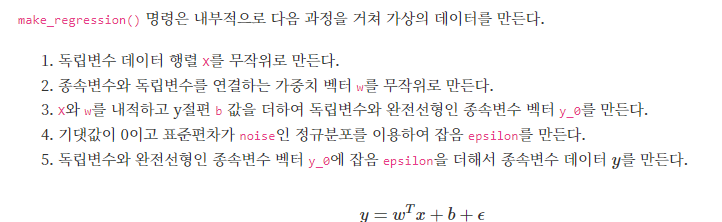

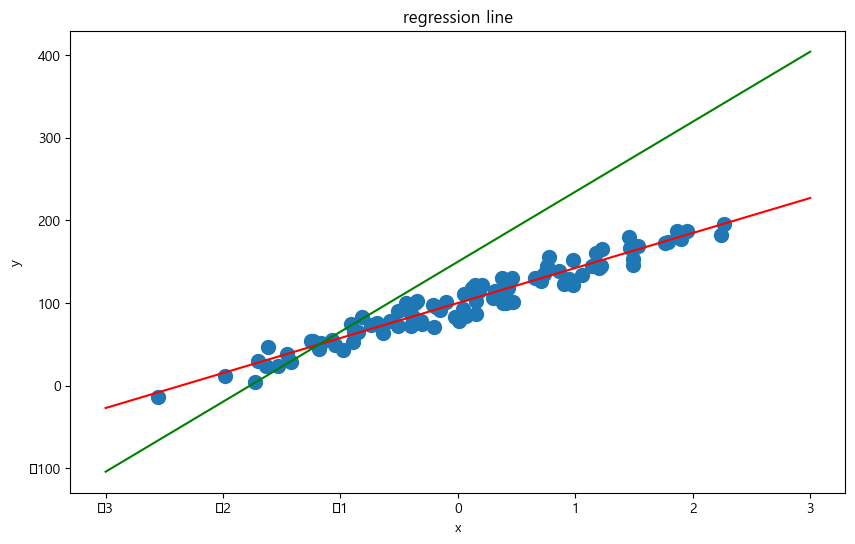

훈련 데이터의 성능 : 
R^2 : 0.9411102712377214
MSE : 114.08793884781785
테스트 데이터의 성능 : 
R^2 : 0.9437320687923872
MSE : 114.83418502778855


C:\Users\dlwns\Desktop\신한대\빅데이터컴퓨팅\python_basic_1-main\python_basic_1-main\venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


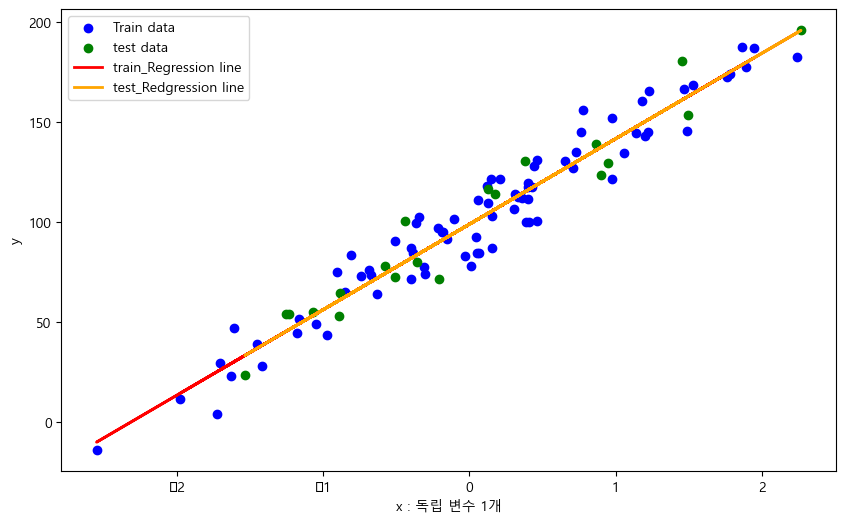

Coef:= [42.66264537], Intercept := 98.93063741326712
y :=[42.66264537], *X + 98.93063741326712


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split   # 외우기
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import make_regression

# 1. 데이터 생성

X, y, w = make_regression(
    n_samples=100, n_features=1, bias=100, noise=10, coef=True, random_state=0 )

# 데이터 분포
xx = np.linspace(-3, 3, 100)
y0 = w * xx + 100
y1 = (w*2) * xx + 150

plt.plot(xx, y0, color = "r")
plt.plot(xx, y1, color = "g")
plt.scatter(X, y, s=100)
plt.xlabel("x")
plt.ylabel("y")
plt.title("regression line")
plt.show()

# 2. 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# 3. 모델 선택
model = LinearRegression()

# 4. 모델 학습 : 학습용 데이터 이용
model.fit(X_train, y_train)

# 5. 학습모델을 이용하여 평가 데이터를 넣어 예측
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# 6. 선형 회귀 모델 성능 평가
print("훈련 데이터의 성능 : ")
print(f"R^2 : {r2_score(y_train, y_train_pred)}")
print(f"MSE : {mean_squared_error(y_train, y_train_pred)}")

print("테스트 데이터의 성능 : ")
print(f"R^2 : {r2_score(y_test, y_test_pred)}")
print(f"MSE : {mean_squared_error(y_test, y_test_pred)}")

# 7. 시각화
plt.scatter(X_train, y_train, color = 'blue', label = 'Train data')
plt.scatter(X_test, y_test, color = 'green', label = 'test data')
plt.plot(X_train, y_train_pred, color = 'red', linewidth = 2,label = 'train_Regression line')
plt.plot(X_test, y_test_pred, color = 'orange', linewidth = 2, label = 'test_Redgression line')
plt.xlabel("x : 독립 변수 1개")
plt.ylabel("y")
plt.legend()
plt.show()

# 8. 최적 선형회귀선
print(f"Coef:= {model.coef_}, Intercept := {model.intercept_}")
print(f"y :={model.coef_}, *X + {model.intercept_}")

#### [Method 2] 경사하강법을 이용하여 선형회귀함수의 가중치와 절편을 구하기 :
  * 하이퍼파라미터:
    * 학습율
    * 가중치
    * 바이어스
    * 에폭 : 학습을 위해서 전체 데이터를 모두 넣어서 에러를 구하는데 이렇게 전체 데이터를 한 번 사용하는 것을 1 epoch


Epoch =: 0, w =: (0.6084556601781518, 2), b =: 10.17, error =:[[ -80.04 -121.34 -111.56 ... -111.78  -47.24  -44.58]
 [ -80.04 -121.34 -111.56 ... -111.78  -47.24  -44.58]
 [ -80.04 -121.34 -111.56 ... -111.78  -47.24  -44.58]
 ...
 [ -80.04 -121.34 -111.56 ... -111.78  -47.24  -44.58]
 [ -80.04 -121.34 -111.56 ... -111.78  -47.24  -44.58]
 [ -80.04 -121.34 -111.56 ... -111.78  -47.24  -44.58]]
Epoch =: 1, w =: (1.0940395642044967, 2), b =: 19.33, error =:[[ -70.09 -111.39 -101.6  ... -101.83  -37.28  -34.63]
 [ -69.28 -110.57 -100.79 ... -101.02  -36.47  -33.81]
 [ -69.63 -110.92 -101.14 ... -101.37  -36.82  -34.16]
 ...
 [ -69.65 -110.95 -101.17 ... -101.39  -36.84  -34.19]
 [ -70.85 -112.15 -102.37 ... -102.59  -38.04  -35.39]
 [ -70.59 -111.88 -102.1  ... -102.33  -37.78  -35.12]]
Epoch =: 2, w =: (1.4753836244083498, 2), b =: 27.56, error =:[[ -61.11 -102.41  -92.62 ...  -92.85  -28.3   -25.65]
 [ -59.65 -100.95  -91.16 ...  -91.39  -26.84  -24.19]
 [ -60.28 -101.57  -91.79 ...  -

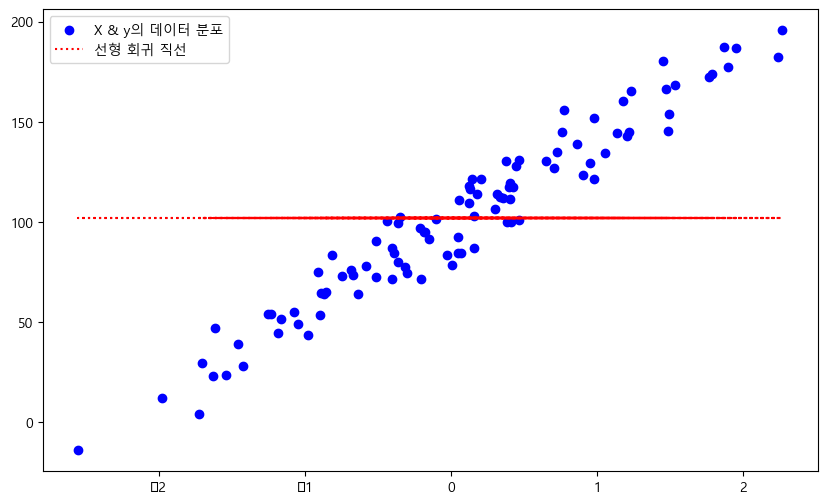

In [24]:
# LinearRegression 사용하지 않고 학습율을 매우 작게 줄 경우
# 하이퍼파라미터 튜닝(2)
w, b = 0, 0
eta , epoch  = 0.00001, 1000 # 학습율과 학습횟수


# 경사하강법 구현
for i in range(epoch):
    y_pred = w*X + b # 선형 회귀 선 (1차 함수)
    error = y_pred - y
    w = w - eta*(error * X).sum()
    b = b - eta*error.sum()
    print(f"Epoch =: {i}, w =: {w,round(2)}, b =: {b.round(2)}, error =:{error.round(2)}")

print('w = ', w.round(2) , ', b=', b.round(2), ', error = ', error.round(2))

# 시각화
plt.scatter(X, y, color = 'blue', label = "X & y의 데이터 분포")
y_pred = w* X + b  # 계산으로 구한 가중치와 절편을 이용하여 선형 회귀 직선그리기
plt.plot(X, y_pred, 'r:', label = "선형 회귀 직선")
plt.legend()




Epoch =: 0, w =: (60845.566017815174, 2), b =: 1017348.02, error =:[[ -80.04 -121.34 -111.56 ... -111.78  -47.24  -44.58]
 [ -80.04 -121.34 -111.56 ... -111.78  -47.24  -44.58]
 [ -80.04 -121.34 -111.56 ... -111.78  -47.24  -44.58]
 ...
 [ -80.04 -121.34 -111.56 ... -111.78  -47.24  -44.58]
 [ -80.04 -121.34 -111.56 ... -111.78  -47.24  -44.58]
 [ -80.04 -121.34 -111.56 ... -111.78  -47.24  -44.58]]
Epoch =: 1, w =: (-1228595870.3860333, 2), b =: -10207836001.73, error =:[[ 995390.76  995349.46  995359.24 ...  995359.02  995423.57  995426.22]
 [1076692.13 1076650.83 1076660.62 ... 1076660.39 1076724.94 1076727.59]
 [1041748.68 1041707.38 1041717.17 ... 1041716.94 1041781.49 1041784.14]
 ...
 [1038951.29 1038909.99 1038919.78 ... 1038919.55 1038984.1  1038986.75]
 [ 919069.45  919028.15  919037.93 ...  919037.7   919102.25  919104.91]
 [ 945431.74  945390.44  945400.23 ...  945400.    945464.55  945467.2 ]]
Epoch =: 2, w =: (18628226359166.99, 2), b =: 102802952007684.45, error =:[[-9.7

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_3716\1340943713.py:12: RuntimeWarning: overflow encountered in multiply
  print(f"Epoch =: {i}, w =: {w,round(2)}, b =: {b.round(2)}, error =:{error.round(2)}")
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_3716\1340943713.py:8: RuntimeWarning: overflow encountered in multiply
  y_pred = w*X + b # 선형 회귀 선 (1차 함수)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_3716\1340943713.py:8: RuntimeWarning: overflow encountered in add
  y_pred = w*X + b # 선형 회귀 선 (1차 함수)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_3716\1340943713.py:10: RuntimeWarning: overflow encountered in multiply
  w = w - eta*(error * X).sum()
C:\Users\dlwns\Desktop\신한대\빅데이터컴퓨팅\python_basic_1-main\python_basic_1-main\venv\lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\dlwns\Desktop\신한대\빅데이터컴퓨팅\python_basic_1-main\python_ba

Epoch =: 567, w =: (nan, 2), b =: nan, error =:[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
Epoch =: 568, w =: (nan, 2), b =: nan, error =:[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
Epoch =: 569, w =: (nan, 2), b =: nan, error =:[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
Epoch =: 570, w =: (nan, 2), b =: nan, error =:[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
Epoch =: 571, w =: (nan, 2), b =: nan, error

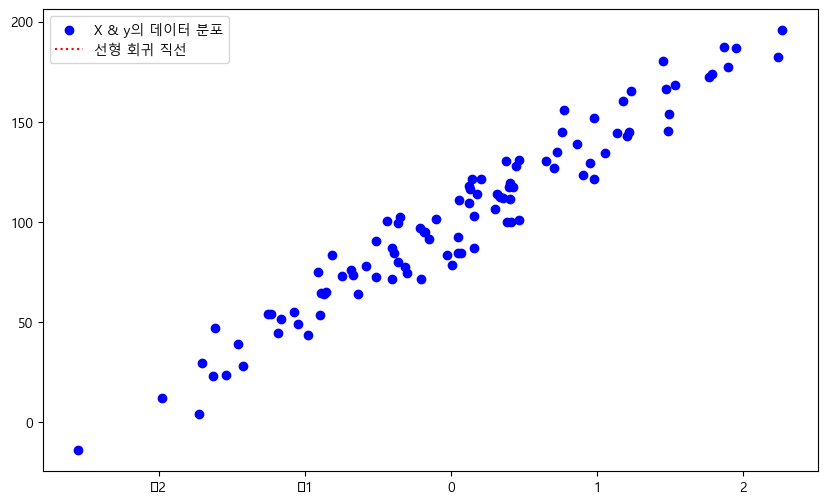

In [25]:
# LinearRegression 사용하지 않고 학습율을 매우 크게 줄 경우
# 하이퍼파라미터 튜닝
w, b = 0, 0
eta , epoch  = 1.0, 1000 # 학습율과 학습횟수

# 경사하강법 구현
for i in range(epoch):
    y_pred = w*X + b # 선형 회귀 선 (1차 함수)
    error = y_pred - y
    w = w - eta*(error * X).sum()
    b = b - eta*error.sum()
    print(f"Epoch =: {i}, w =: {w,round(2)}, b =: {b.round(2)}, error =:{error.round(2)}")

print('w = ', w.round(2) , ', b=', b.round(2), ', error = ', error.round(2))

# 시각화
plt.scatter(X, y, color = 'blue', label = "X & y의 데이터 분포")
y_pred = w* X + b  # 계산으로 구한 가중치와 절편을 이용하여 선형 회귀 직선그리기
plt.plot(X, y_pred, 'r:', label = "선형 회귀 직선")
plt.legend()



## [심화 프로그래밍 : LinearRegression]
* 선형 회귀 모델을 사용하여 Seaborn의 데이터셋에서 연도와 항공기 승객 수 사이의 상관관계를 분석하고, 모델의 계수와 절편을 구한 후, 예측 점수를 출력하고 결과를 시각화하는 코드를 작성
* 독립 변수가 2개 이상인 경우


In [26]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# flights 데이터셋 로드
flights = sns.load_dataset("flights")

# flights 데이터셋의 정보 출력
print(flights.info())

# flights 데이터셋의 상위 5행 출력
print(flights.head())
print(flights.describe())

# flights 데이터 셋의 shape을 출력
print(flights.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB
None
   year month  passengers
0  1949   Jan         112
1  1949   Feb         118
2  1949   Mar         132
3  1949   Apr         129
4  1949   May         121
              year  passengers
count   144.000000  144.000000
mean   1954.500000  280.298611
std       3.464102  119.966317
min    1949.000000  104.000000
25%    1951.750000  180.000000
50%    1954.500000  265.500000
75%    1957.250000  360.500000
max    1960.000000  622.000000
(144, 3)


(1) flights의 groupby() 기능과 sum()메서드를 사용하여 다음과 같이 연도별 이용객의 수를 출력하시오.

In [32]:
result = flights.groupby(['year'])['passengers'].sum()
print(result)
type(result)

year
1949    1520
1950    1676
1951    2042
1952    2364
1953    2700
1954    2867
1955    3408
1956    3939
1957    4421
1958    4572
1959    5140
1960    5714
Name: passengers, dtype: int64


pandas.core.series.Series

(2) 연도 값을 X축으로 하고, 연간 승객의 수를 y축으로 하여 다음과 같은 선 그래프를 그리시오.

Text(0.5, 1.0, 'Line chart : Total passengers per Year')

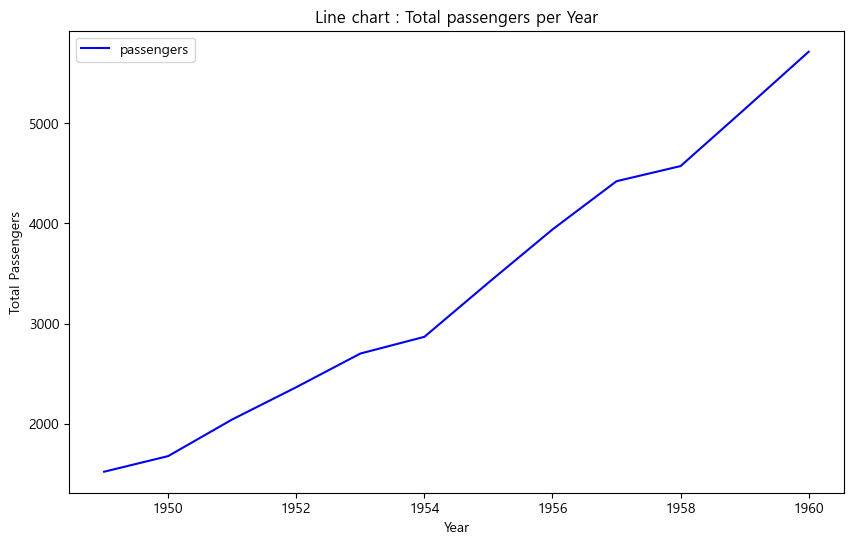

In [33]:
# 1) X 축 : 연도 값
X = result.index

# 2) Y 축 : 연간 승객의 수
y = result.values # values ======== numpy ndarray, df.to_numpy()

# 3) 시각화
plt.plot(X, y, color ='blue', label = 'passengers')
plt.legend()
plt.xlabel("Year")
plt.ylabel("Total Passengers")
plt.title("Line chart : Total passengers per Year")

(3) 연도별 항공기 승객의 증가 추이를 scatter()을 이용하여 시각화하여라

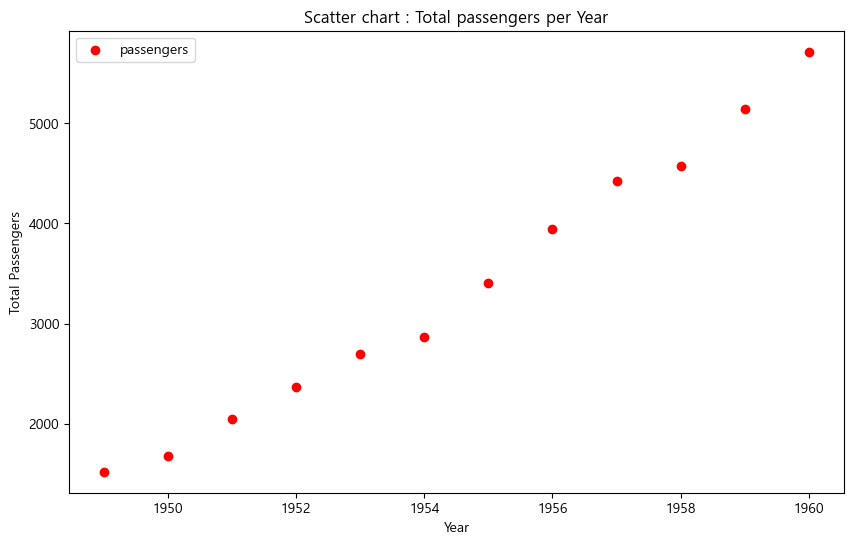

In [35]:
plt.scatter(X, y, label = "passengers", color = "red") # 데이터 분포를 시가고ㅘ
plt.xlabel("Year")
plt.ylabel("Total Passengers")
plt.title("Scatter chart : Total passengers per Year")
plt.legend()

(4) 연도와 항공기 승객의 수 사이에는 상관관계을 선형회귀 분석으로 모델링하시오.
  * 선형회귀분석을 통해서 선형회귀모델의 계수와 절편을 구하기.
  * 이 선형회귀모델이 입력값(연도)에 대하여 항공기 승객의 수를 예측하는데 얼마나 적합한지 예측점수를 출력

In [36]:
# 1. 모델 선택
from sklearn import linear_model
# 2.
model = linear_model.LinearRegression()
# 3.
X = result.index  # X.shape 하면 값으로 (12,1)가 나온다
X = X.values.reshape(-1, 1) # 1차원 백터 -> 2차원 배열로 변경
model.fit(X,y)

#4.
print(f"w= {model.coef_}, b = {model.intercept_}, score = {model.score(X,y).round(2)}")



w= [383.08741259], b = -745380.7645687643, score = 0.99


(5) 산점도 그래프와 선형회귀직선을 다음과 같이 한 그래프위에 표시하시오

In [37]:
# 우리가 구한 가설함수의 가중치와 절편이 데이터의 분포를 제대로 설명하는가 시각화해서 분석하기
# 위에서 w, b값 사용해서 그리기

(7) 예측 모델의 성능 평가을 하시오

In [39]:
# 1. 
y_pred = model.predict(X)
# 2.
r2 = r2_score(y, y_pred)          # r2_score는 r1_score를 이용해서 구한거다
r = model.score(X, y_pred)
mse = mean_squared_error(y, y_pred)      # mean_squared_error도 잘 알아두자
print(f"r2 ={r2}, mse={mse}, r ={r}")

r2 =0.9866055381778157, mse=23742.81866744399, r =1.0


(8) 2020년에 기대하는 승객의 수를예측 하시오

In [46]:
# 3.
y = model.coef_*[[2020]] + model.intercept_
print(y)

[[28455.80885781]]


## [심화 프로그래밍 : SGDRegressor]

Model_1 coefficient: [0.89972681]
Model_1 intercept: [0.00086147]
Model_baseline coefficient: [0.99328019]
Model_baseline intercept: -1.4765671229267874e-16
R-squared: 0.9778525613795426
Mean Squared Error: 39258.21179638222


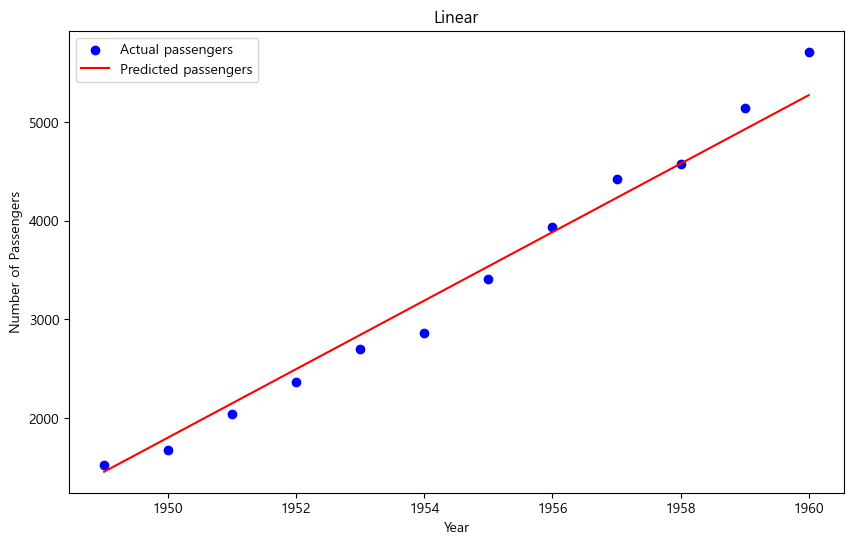

In [70]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor, LinearRegression , Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler       # 에측 성능 개선(전처리 작업)

# 1. 데이터 로드
flights = sns.load_dataset('flights')

# 2. 데이터 전처리
# 연도별 승객 수를 추출
result = flights.groupby(['year'])['passengers'].sum()

# X, y 정의
X = result.index.to_numpy().reshape(-1,1)    # 2차원 배열로 표시
y = result.values.reshape(-1,1)              # 데이터 표준화 작업에 필요 , 2차원 배열로 변경

# 3. 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y).ravel()  # 1차원으로 만들어준다

# 4. 선형 회귀 모델 정의
model_1 = SGDRegressor(max_iter = 1000, learning_rate = 'constant', eta0 = 0.005)
model_baseline = LinearRegression()

# 5. 모델 학습
model_1.fit(X_scaled, y_scaled)
model_baseline.fit(X_scaled, y_scaled)

# 6. 모델 계수와 절편 출력
print(f"Model_1 coefficient: {model_1.coef_}")
print(f"Model_1 intercept: {model_1.intercept_}")

print(f"Model_baseline coefficient: {model_baseline.coef_}")
print(f"Model_baseline intercept: {model_baseline.intercept_}")

# 7. 예측
y_pred_scaled = model_1.predict(X_scaled)
y_pred = scaler.inverse_transform(y_pred_scaled.reshape(-1,1)).ravel() # 예측된 값을 역 표준화하여 원래 스케일로 변환

# 8. 평가 점수 출력
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)
print(f"R-squared: {r2}")
print(f"Mean Squared Error: {mse}")

# 9. 결과 시각화
plt.figure(figsize = (10,6))
plt.scatter(X, y, color = 'blue', label = 'Actual passengers')
plt.plot(X, y_pred, color = 'red', label = 'Predicted passengers')
plt.xlabel("Year")
plt.ylabel("Number of Passengers")
plt.title("Linear")
plt.legend()
plt.show()

## [다중(다변량:multivariate) 회귀분석 문제]
* 고급 데이터 분석
* 상관도 분석 기법을 이용하여 주요 특징을 추출하는 방법을 이해
* 머신러닝을 위하여 훈련데이터와 검증 데이터 분리하는 이유 이해하기

* 최적화 머신 러닝 모델 :
  * 현재 데이터를 잘 설명하는 모델
  * 미래 데이터에 대한 예측 성능이 좋은 모델

(1) 다변량 선형회귀 분석에서 오차 함수 MSE(Mean Squared Error)
* 예측값과 실제값의 차이의 제곱의 평균으로 계산
*  MSE는 모델의 성능을 평가하는 데 사용되는 손실 함수
* MSE가 낮을수록 모델의 성능이 좋다.
* 다변량 선형회귀 분석에서 MSE를 최소화하는 것은 모델의 성능을 최적화하는 것을 의미
  * MSE를 최소화하기 위해서는 회귀 계수 벡터 β를 조정
  * 이는 일반적으로 경사 하강법과 같은 최적화 알고리즘을 사용하여 수행

* 다변량 선형회귀 분석에서 MSE는 모델의 성능을 평가할 때 유일한 지표로 사용해서는 안 됨.
  * MSE는 모델이 몇 개의 데이터 포인트에 대해 큰 오류를 예측하면 MSE가 크게 증가할 수 있다.
* MSE를 사용하여 다변량 선형회귀 분석 모델의 성능을 평가할 때는 주의
  *  MSE가 높다고 해서 모델이 항상 나쁜 것은 아니라는 점을 기억하는 것이 중요
  * 모델의 성능을 평가할 때는 MSE와 다른 지표(예: R^2)를 함께 고려하는 것이 좋다.

### [심화 프로그래밍 문제] - LinearRegression
* Kaggle 사이트의 공개 데이터를 바탕으로 나라별 기대수명을 예측을 할 수 있는 모델링
  * 세계보건기구(WHO)에서 내어놓은 나라별 기대수명 데이터
  * 2000년부터 2015년까지 나라별 기대수명과 보건예산, 질병통계, 비만도 등이 정리되어 있음

In [51]:
import pandas as pd
import seaborn as nss
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# 1. 데이터 탐색
life = pd.read_csv("life_expectancy.csv")
life

,Country,Year,Status,Life expectancy,Adult mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [50]:
life.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult mortality',
       'Infant deaths', 'Alcohol', 'Percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'Under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'Thinness 1-19 years',
       'Thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

* 상관도가 높은 특징을 기반으로 최적의 모형 찾기
  * 기대수명 예측하기
  * 피처 선택: 속성 변수 들 중에서 어떤 변수들을 잘 조합해야 좋은 예측을 할 수 잇을까
    * 상관도가(기여도)가 높은 유의한 속성 변수부터 하나씩 추가하는 방법

2. feature enginnering : 중요 특징 추출

* 1) 기대수명 데이터 탐색

In [55]:
!pip install missingno

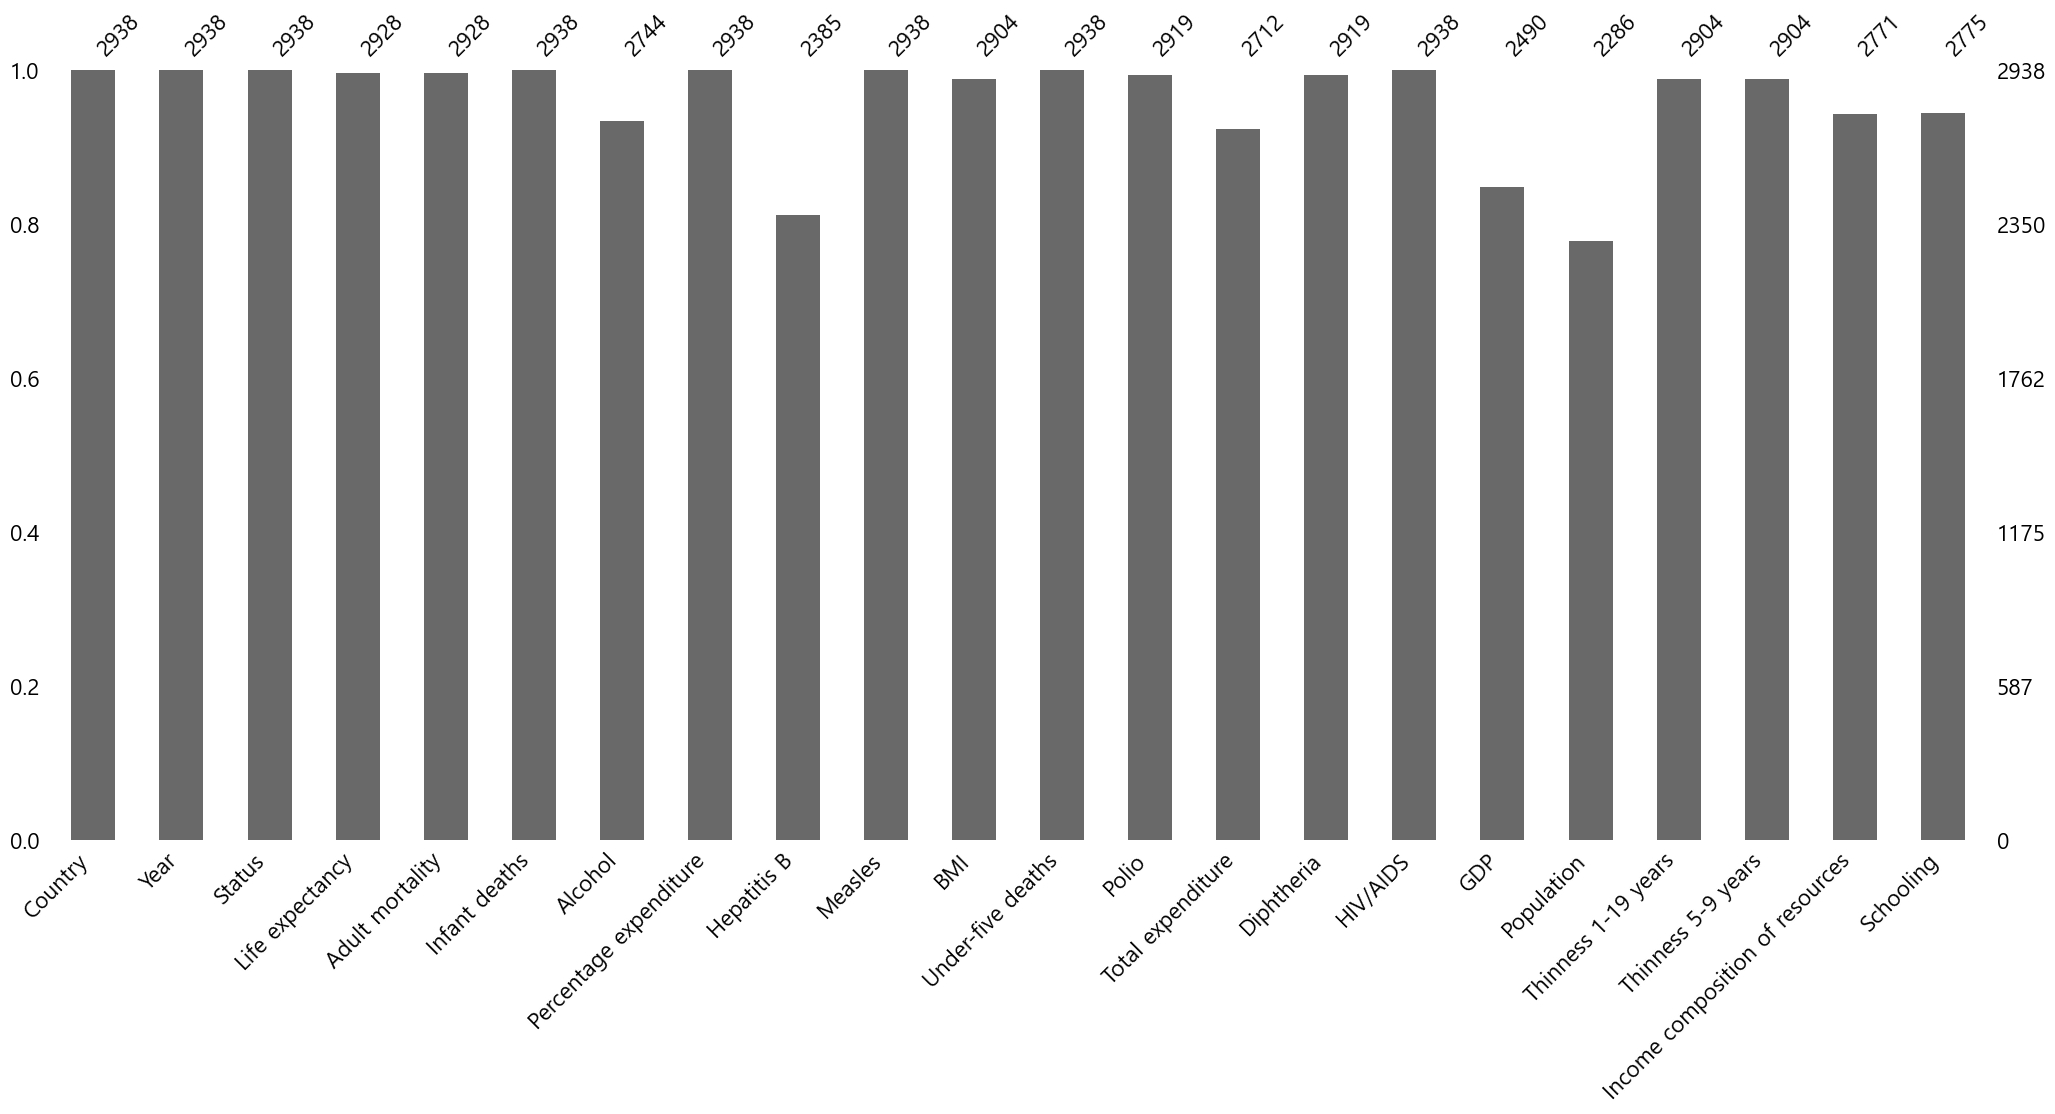

In [57]:
# 결측값 찾기
life.isna().sum()

import missingno as msno       
msno.bar(life)                # 막대그래프로 시각화

# 결측치 처리
life.dropna(inplace = True)

In [58]:
life

,Country,Year,Status,Life expectancy,Adult mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [60]:
life.info()        # 정보 확인

<class 'pandas.core.frame.DataFrame'>
Index: 1649 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1649 non-null   object 
 1   Year                             1649 non-null   int64  
 2   Status                           1649 non-null   object 
 3   Life expectancy                  1649 non-null   float64
 4   Adult mortality                  1649 non-null   float64
 5   Infant deaths                    1649 non-null   int64  
 6   Alcohol                          1649 non-null   float64
 7   Percentage expenditure           1649 non-null   float64
 8   Hepatitis B                      1649 non-null   float64
 9   Measles                          1649 non-null   int64  
 10  BMI                              1649 non-null   float64
 11  Under-five deaths                1649 non-null   int64  
 12  Polio                    

2) 범주형 변수 더미화

In [62]:
dum = pd.get_dummies(life.Country, prefix='c',
                         dtype=float)
life = pd.concat([life.drop('Country', axis=1), dum], axis =1)
life.head()
life.columns

AttributeError: 'DataFrame' object has no attribute 'Country'

In [64]:
dum = pd.get_dummies(life['Status'], prefix='s',
                         dtype=float)
life = pd.concat([life.drop('Status', axis=1), dum], axis =1)
life.head()

KeyError: 'Status'

In [65]:
life.columns

Index(['Year', 'Life expectancy', 'Adult mortality', 'Infant deaths',
       'Alcohol', 'Percentage expenditure', 'Hepatitis B', 'Measles', 'BMI',
       'Under-five deaths',
       ...
       'c_Turkmenistan', 'c_Uganda', 'c_Ukraine', 'c_Uruguay', 'c_Uzbekistan',
       'c_Vanuatu', 'c_Zambia', 'c_Zimbabwe', 's_Developed', 's_Developing'],
      dtype='object', length=155)

3) 기대수명과 상관도가 높은 특징 추출

In [66]:
# (1) 기대수명('Life expectancy')에 관련된 다른 특성들과의 상관계수 값만을 출력
result = life.corr().round(2)['Life expectancy']
result

Year               0.05
Life expectancy    1.00
Adult mortality   -0.70
Infant deaths     -0.17
Alcohol            0.40
                   ... 
c_Vanuatu          0.02
c_Zambia          -0.11
c_Zimbabwe        -0.22
s_Developed        0.44
s_Developing      -0.44
Name: Life expectancy, Length: 155, dtype: float64

Text(0, 0.5, 'features')

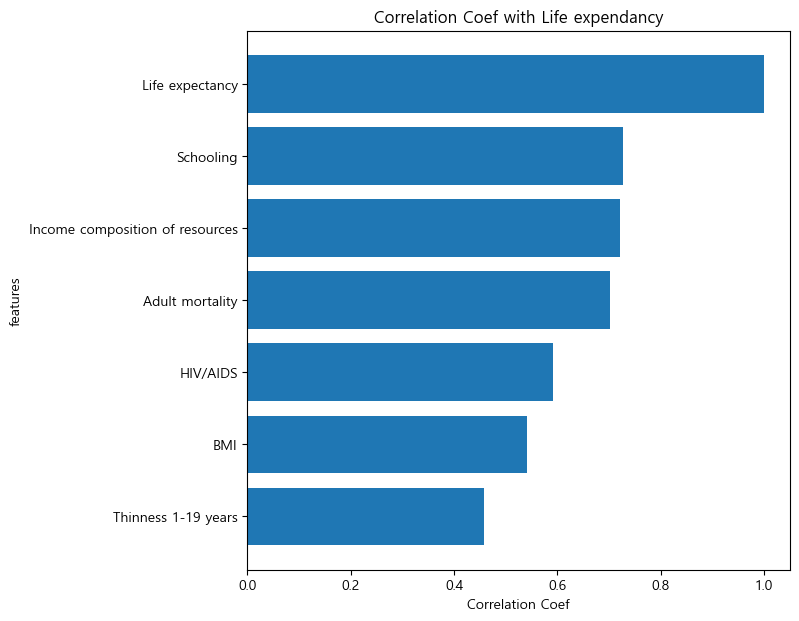

In [ ]:
# (2) 특징 선택
life = life[['Life expectancy','Adult mortality', 'BMI', 'HIV/AIDS', 'Thinness 1-19 years',
       'Thinness 5-9 years', 'Income composition of resources', 'Schooling']]

# 'Life expectancy'와 다른 속성들의 상관계수 구하기


4) 기대수명과 특성 분석
* 상관도가 높은 특징들을 추출


In [ ]:
# features 선택
# X, y 설정
X = life[['Adult mortality', 'BMI', 'HIV/AIDS', 'Thinness 1-19 years',
       'Thinness 5-9 years', 'Income composition of resources', 'Schooling']]

y = life['Life expectancy']

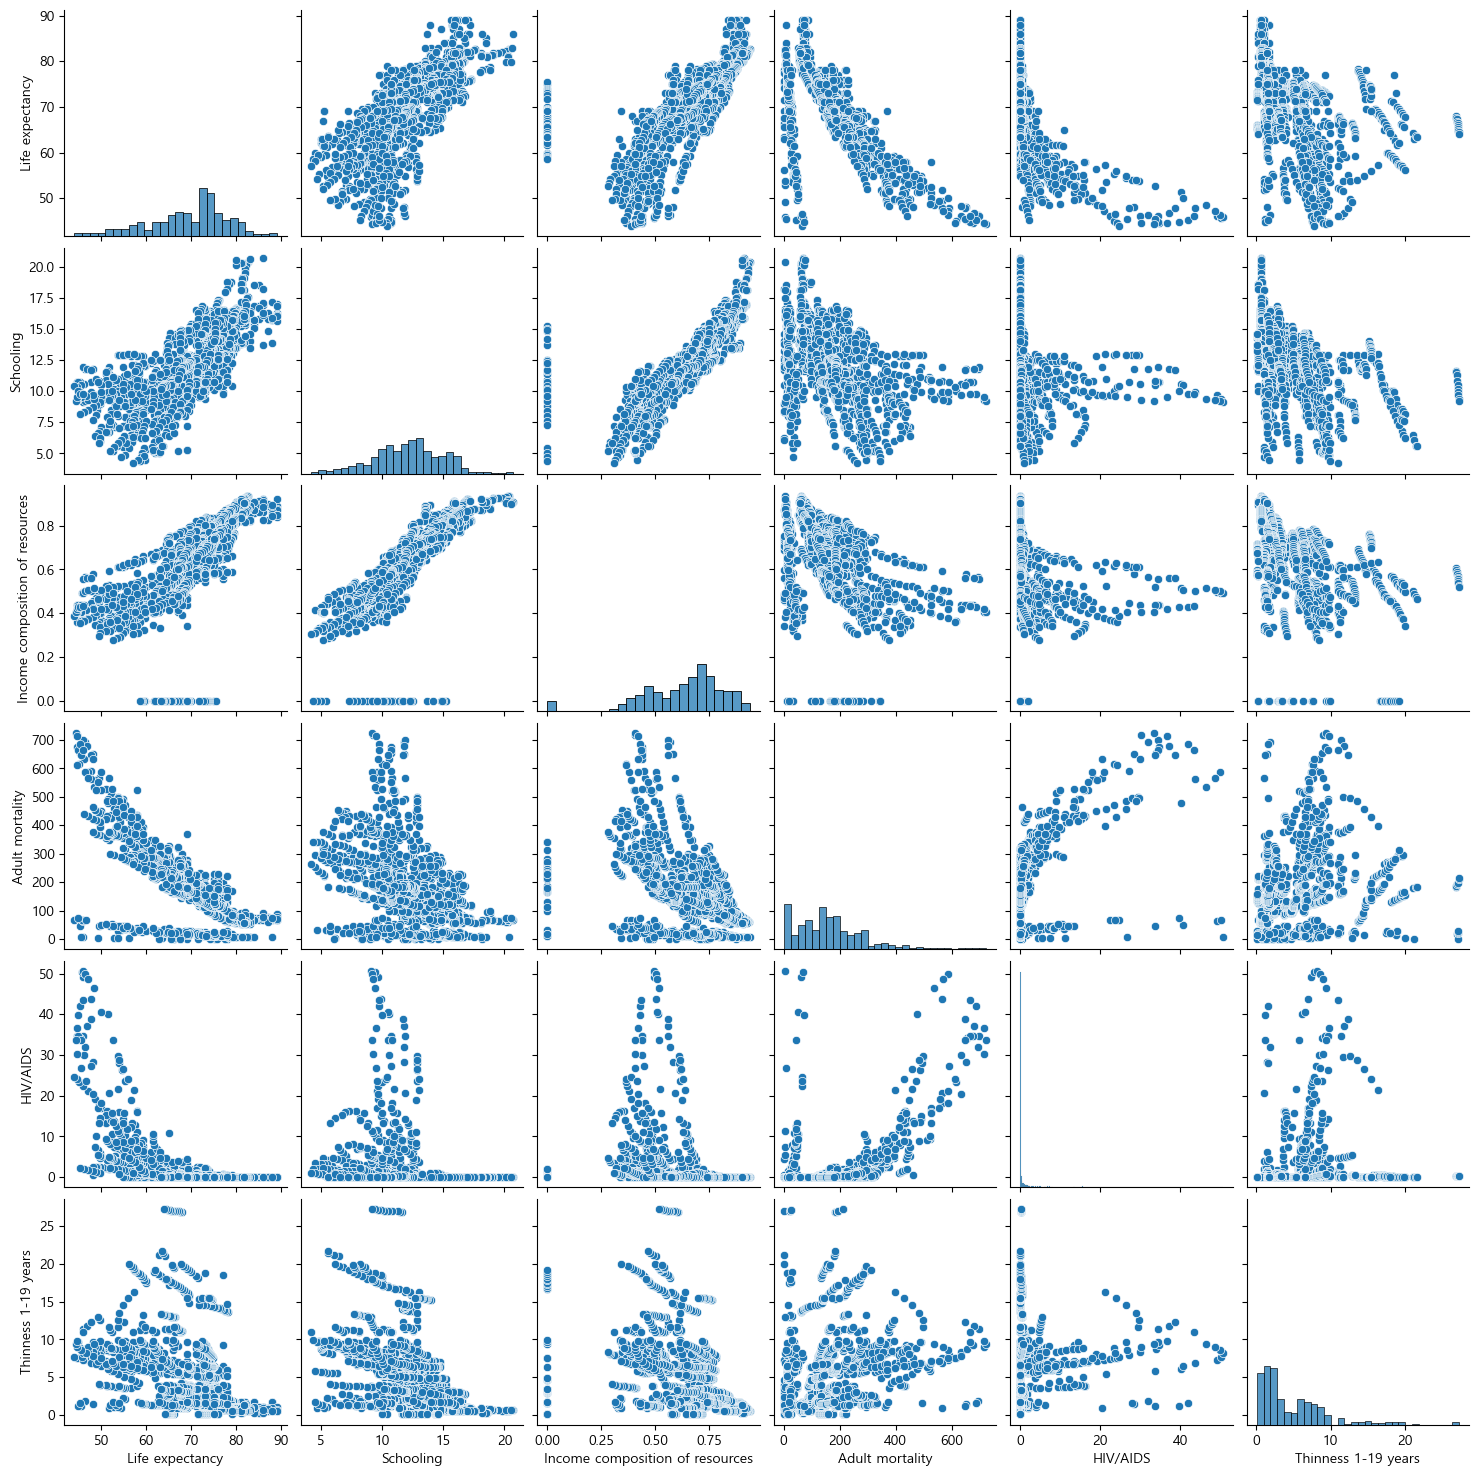

In [ ]:
# 시본 라이브러리의 기대수명과 상관도가 높은 5개의 특성에 대한 쌍 그래프 그리기 --- 대각선 모양의 분포
sns.pairplot(life[['Life expectancy', 'Schooling', 'Income composition of resources', 'Adult mortality', 'HIV/AIDS', 'Thinness 1-19 years']])
plt.show()

6) 학습데이터와 평가데이터 분리
*  X_train, y_train : 선형회귀 학습
*  X_test, y_test: 모델 평가
  * 모델이 새로운 데이터에 대하여 어느 정도의 정확도을 보일지 예측
* 과적합: 모델이 특정한 학습 데이터에만 최적화되어 좋은 성능을 보이고, 새로운 데이터에 대해서는 좋은 성능을 나타내지 못하는 경우를 데이터의 일반화 능력이 부족

7) 모델 학습 : LinearRegression

Model coefficients: [-0.02  0.03 -0.44  0.   -0.08 10.19  1.04]
Model Intercept : 53.35
Model Intercept : 0.82


8. 모델 평가

Mean squared error: 12.624456883753112
r2: 0.8198056062904611


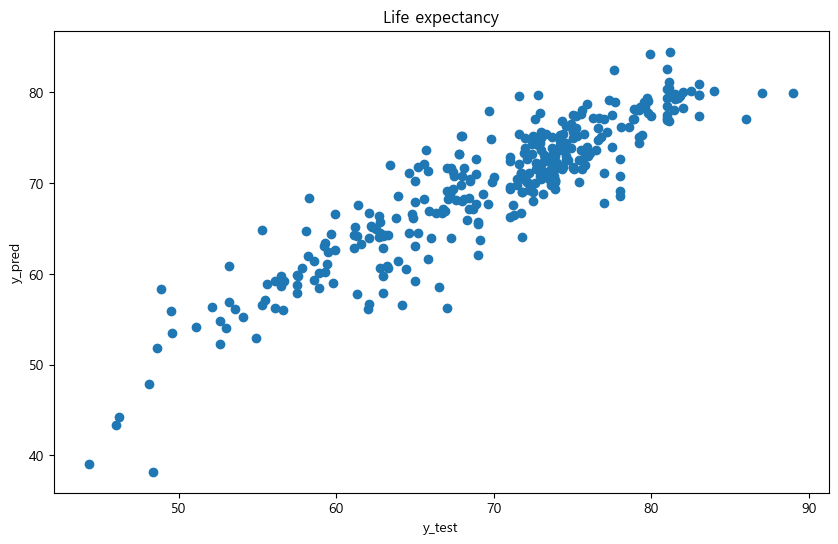

8) garbage-in Garbage-out
* 특성의 수가 증가하는 만큼의 큰 성능 향상은 이루저지 않는다.
* 쓸모없는 데이터가 입력으로 들어가면 쓸모없는 결과만 나올뿐 의미

### [다항회귀모델 문제]
* X값의 범위가 -4에서 4 사이의 값이고, 다음의 3차 방정식을 만족하는 분포를 가지는 y데이터를 생성한다.
* 데이터의 갯수는 100개 이며, y 값에 정규분포를 따르는 난수가 들어가도록 한다.


* 과재적합 주의
  * 다항 회귀 모델의 항이 많아지고 차수가 커질수록 모델의 표현 능력이 좋아짐  *

다항회귀모델의 함수 =  1.0
다항 회귀 모델의 계수 = [[-5.40463310e-01  7.37740914e+00  8.50275509e+00 -4.24592234e+00
   9.07872417e-01  4.15660999e+00 -4.59875391e+00  2.22888546e+00
   3.16620334e+00 -3.57124236e+00  3.52487974e+00  7.43194005e+00
   7.38679397e-01 -2.44824363e+00 -7.77088747e-01  2.36205010e-01
   1.28476756e-01  1.37432487e-03 -6.25375001e-03 -7.79841755e-04]]
다항 회귀 모델의 절편 = [2.66522506]
테스트 데이터에 대한 다항회귀모델의 점수 =  -10275267405738.09


C:\Users\USER\AppData\Local\Temp\ipykernel_14840\1119605063.py:50: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.savefig("overfitting.jpg")
C:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


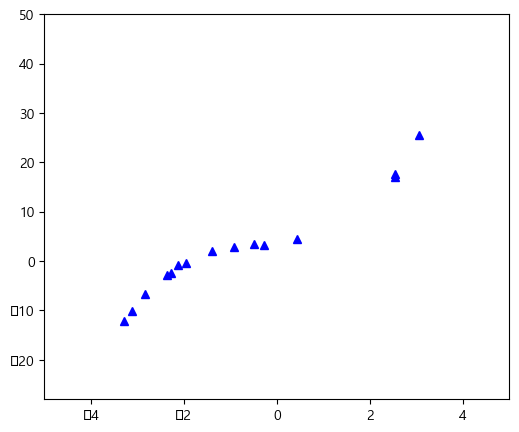

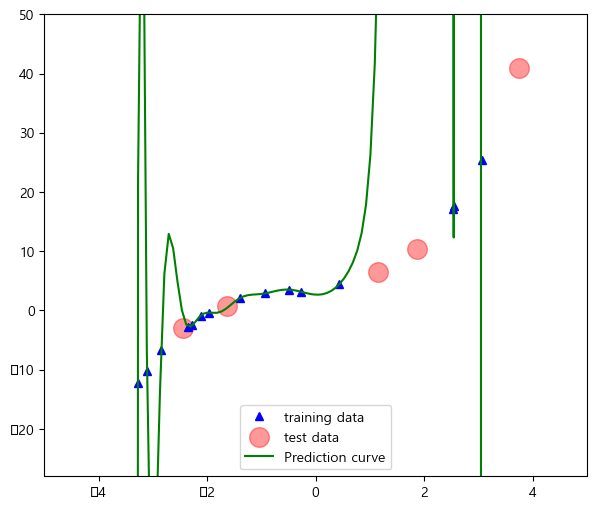

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 20개의 데이터를 생성하고 시각화
m = 20
X = 8 * np.random.rand(m, 1) - 4
y = .5 * X ** 3 + .5 * X ** 2 + X + 3 + np.random.rand(m,1)

# 20개의 데이터를 학습용 데이터, 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y)

plt.figure(figsize = (6,5))
plt.xlim(-5, 5) # X 의 범위 지정
plt.ylim(-28,50)
plt.plot(X_train, y_train, "b^") #학습용 데이터

# 다항회귀 모델을 만들고 점수와 계수, 절편을 출력
from sklearn.preprocessing import PolynomialFeatures

# 다항 특성이 20개가 되도록 만들기 - 차수가 20인 다항 특성을 생성
poly_features = PolynomialFeatures(degree = 20,\
                                   include_bias = False)
X_poly = poly_features.fit_transform(X_train)
model = LinearRegression()
model.fit(X_poly, y_train)
print("다항회귀모델의 함수 = ", model.score(X_poly, y_train).round(2))
print("다항 회귀 모델의 계수 =", model.coef_)
print("다항 회귀 모델의 절편 =", model.intercept_) # 좋은 점수이 나오는 이유는 많은 항의 계수들 덕분에 학습 데이터에 튜닝이 되었기때문에

# 테스트 데이터를 다항 회귀 모델의 입력으로 주고 예측 점수를 구하기
X_poly = poly_features.fit_transform(X_test)
print("테스트 데이터에 대한 다항회귀모델의 점수 = ", model.score(X_poly, y_test).round(2))

# 다항 회귀 곡선 그리기
X_new = np.linspace(-4, 4, 100).reshape(100,1)
X_new_poly = poly_features.transform(X_new)
y_new = model.predict(X_new_poly)

plt.figure(figsize = (7,6))
plt.xlim(-5, 5)
plt.ylim(-28, 50)

#학습용 데이터와 다항 회귀 곡선을 그려보고 테스트 데이터 그리기
plt.plot(X_train, y_train, "b^", label="training data")
plt.scatter(X_test, y_test, c = 'red', s= 200, alpha = 0.4, label = "test data")
plt.plot(X_new, y_new, "g-", label = "Prediction curve")
plt.legend()
plt.savefig("overfitting.jpg")


### [개선 모델]
* 기본 선형 회귀 모델을 최적화하여 예측 성능을 향상시키기 위해 방식을 사용
* 정규화를 추가한 Ridge 회귀 모델을 사용하여 성능을 향상
* Ridge 회귀는 L2 정규화를 통해 모델의 복잡성을 제어하고, 과적합을 방지

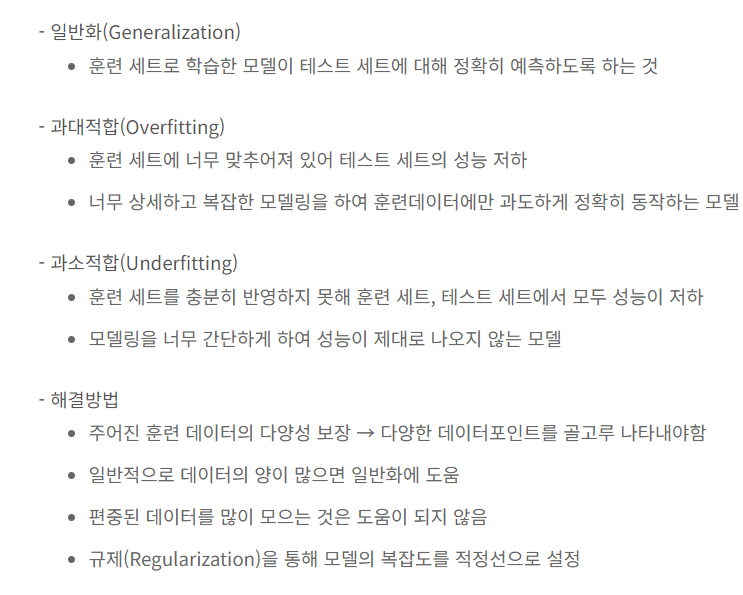

### 릿지 회귀와 alpha 값
* 모든 입력값에 대하여 표준 스케일러를 사용하여 스케일을 적용한 후에 사용
* 이렇게 표준 스케일러를 사용하는 이유는 릿지 회귀 모델이 입력 값의 스케일에 매우 민감하게 수행하기 때문이다.
* 다항 회귀와 Ridge 회귀를 사용하여 데이터의 예측 성능을 평가하고, 다양한 alpha 값에 따른 Ridge 회귀 모델의 성능 변화를 시각화.
* 이를 통해 최적의 alpha 값을 선택하여 모델의 성능을 최적화

* 개선 : 주택가격 예측

r2:-0.006259811615639155, mse:12871872586.491333
r2:-0.007620845998547177, mse:12889282663.849483
r2:-0.006251016224993133, mse:12871760077.62788

Cross-validation scores:
Linear Regression - Mean R-squared (R2) Score: -0.19497738544384186
SGD Regression - Mean R-squared (R2) Score: -0.18841487389126446
Ridge Regression - Mean R-squared (R2) Score: -0.19492600662387352


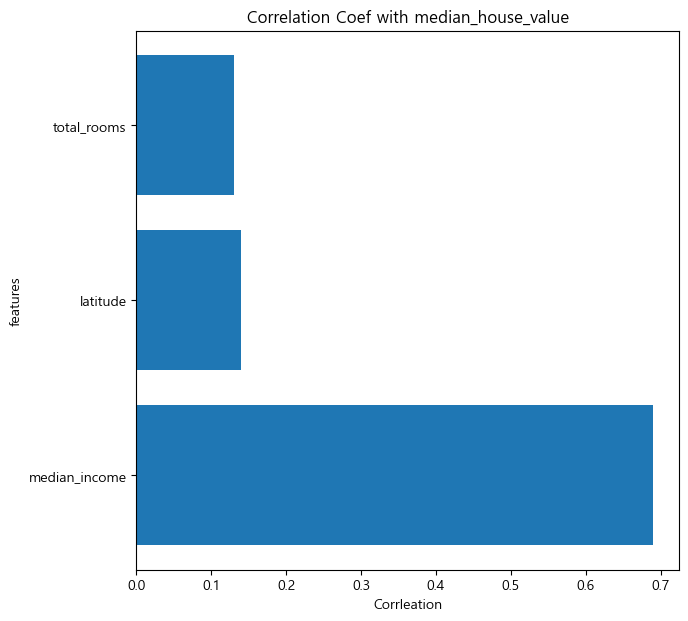

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor, LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import missingno as msno
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# 1. 데이터 로드
housing_train = pd.read_csv("california_housing_train.csv")
housing_test = pd.read_csv("california_housing_test.csv")

#  2. 데이터 탐색
housing_train.isna().sum()
housing_test.isna().sum()
# msno.bar(housing_train)
# plt.show()

# 3. 데이터 전처리
y_train = housing_train["median_house_value"]
y_test = housing_test["median_house_value"]

# 'median_house_value'에 상관도가 높은 특징 추출 및 시각화 : Garbage in Garbage out
result = housing_train.corr().round(2)['median_house_value']
result = np.abs(result).sort_values(ascending = False)[1:4]


plt.figure(figsize=(7,7))
plt.barh(result.index, result.values)
plt.title('Correlation Coef with median_house_value')
plt.xlabel('Corrleation')
plt.ylabel('features')

# 'median_house_value'와 상관도가 높은 4개의 특징에 대한 쌍 그래프 그리기 - 대각선 모양의 분포
features = ['latitude', 'total_rooms', 'median_income']
# features = ['median_income']

# g = sns.pairplot( housing_train[features + ["median_house_value"]])
# g.fig.suptitle("califonia_housing")
# # g.savefig("Housing_price.jpg")
# # plt.show()

# 데이터셋 분리
X_train = housing_train[features].index.to_numpy().reshape(-1,1)
X_test = housing_test[features].index.to_numpy().reshape(-1,1)
y_train = y_train.values
y_test = y_test.values

# 데이터 표준화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

y_train_scaled = scaler.fit_transform(y_train.reshape(-1, 1)).ravel()
y_test_scaled = scaler.transform(y_test.reshape(-1, 1)).ravel()

# 모델 리스트
models = {'Linear Regression': LinearRegression(),
          'SGD Regression': SGDRegressor(max_iter=100, learning_rate='constant', eta0=0.005),
          'Ridge Regression' : Ridge(alpha = 10)}

# 모델 학습 및 평가

for name, model in models.items():
  model.fit(X_train_scaled, y_train_scaled)
  y_pred_scaled = model.predict(X_test_scaled)
  y_pred = scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()
  r2 = r2_score(y_test, y_pred)
  mse = mean_squared_error(y_test, y_pred)
  print(f"r2:{r2}, mse:{mse}")


# 교차 검증을 통한 평가
print("\nCross-validation scores:")
for name, model in models.items():
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')
    print(f"{name} - Mean R-squared (R2) Score: {np.mean(scores)}")

# #  결과 시각화
# plt.figure(figsize=(10, 6))
# plt.scatter(X_test, y_test, color='blue', label='Actual price')
# plt.plot(X_test, y_pred_baseline, color='red', label= "LinearRegression")
# plt.plot(X_test, y_pred, color='green', label= "SGDRegressor")

# plt.xlabel('Actual Price')
# plt.ylabel('Predicted Price')
# plt.title('Linear Regression: Year vs Housing')
# plt.legend()
# plt.show()

